In [37]:
import csv
import matplotlib.pyplot as plt 
from math import log, sqrt

In [38]:
# load all the data from a csv file
def loadDataMoreInputs(fileName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    return dataNames, data

# extract a particular feature (column)
def extractFeature(allData, names, featureName):
    pos = names.index(featureName)
    return [float(data[pos]) for data in allData]

# plot a histogram for some data x
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 20)
    plt.title('Histogram of ' + variableName)
    plt.show()

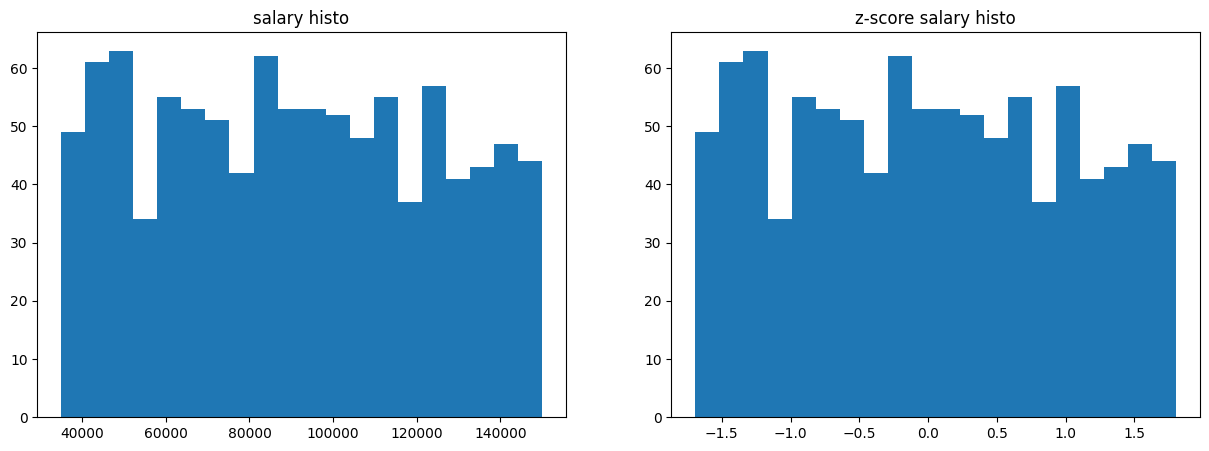

In [39]:
# standardisation
# it preserves the data distribution
import os

crtDir =  os.getcwd()
filePath = os.path.join(crtDir,  'data', 'employees.csv')

names, allData = loadDataMoreInputs(filePath)
salaries = extractFeature(allData, names, 'Salary')
m = sum(salaries) / len(salaries)
s = (1 / len(salaries) * sum([ (p - m) ** 2 for p in salaries])) ** 0.5 
salariesZscore = [(p - m) / s for p in salaries]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(salaries, 20)
ax1.set_title('salary histo')
ax2.hist(salariesZscore, 20)
ax2.set_title('z-score salary histo')
plt.show()

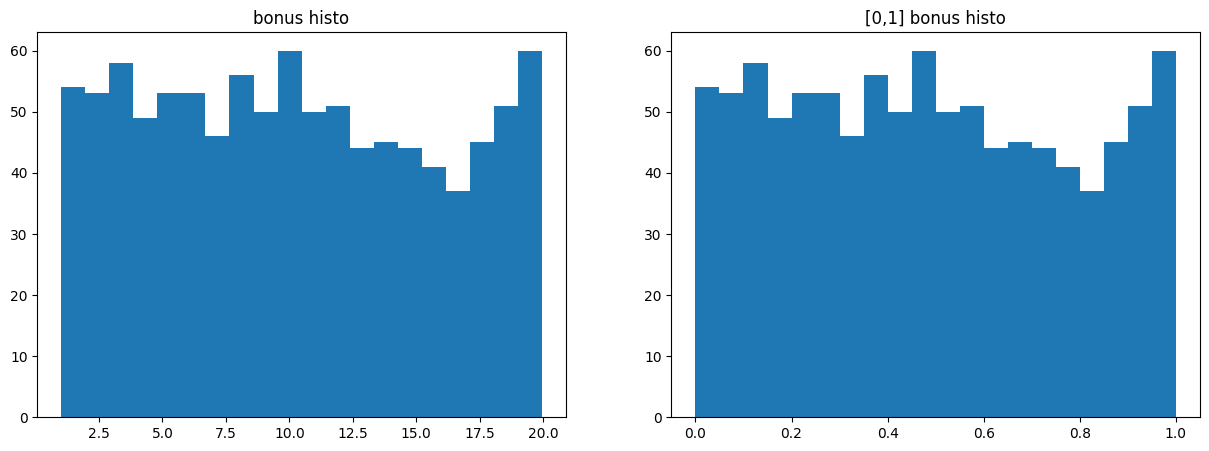

In [40]:
# [0, 1] scalling
# it helps to map data into the same range
import os

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'employees.csv')

names, allData = loadDataMoreInputs(filePath)
bonuses = extractFeature(allData, names, 'Bonus %')
bonusesScaled01 = [(p - min(bonuses)) / (max(bonuses) - min(bonuses)) for p in bonuses]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(bonuses, 20)
ax1.set_title('bonus histo')
ax2.hist(bonusesScaled01, 20)
ax2.set_title('[0,1] bonus histo')
plt.show()

{'Marketing': 0, 'Finance': 1, 'Client Services': 2, 'Legal': 3, 'Product': 4, 'Engineering': 5, 'Business Development': 6, 'Human Resources': 7, 'Sales': 8, 'Distribution': 9}


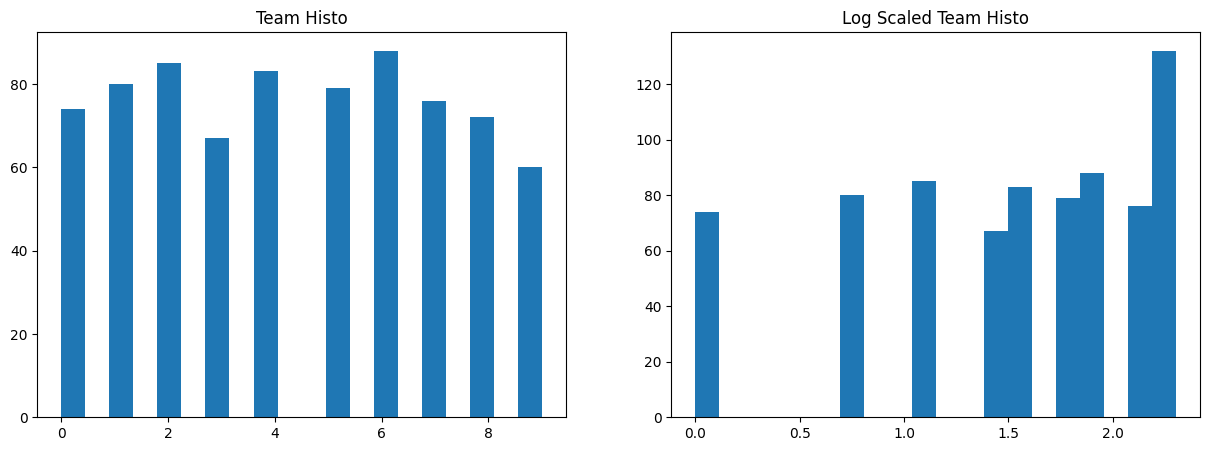

In [41]:
# log scaling
# Log scaling is helpful when a handful of your values have many points, while most other values have few points. This data distribution is known as the power law distribution.
import os
import pandas as pd
import matplotlib.pyplot as plt
from math import log

# Read the data from the CSV file into a DataFrame and drop rows with missing values
df_employees = pd.read_csv('data/employees.csv', delimiter=',', header='infer').dropna()

# Encode the 'Team' column into numerical values
team_encoding = {team: index for index, team in enumerate(df_employees['Team'].unique())}
print(team_encoding)

# Define a function to extract the encoded 'Team' feature
def extractFeature(allData, names, featureName):
    pos = names.index(featureName)
    return [team_encoding[data[pos]] for data in allData]

# Extract the encoded 'Team' feature
teams = extractFeature(df_employees.values.tolist(), df_employees.columns.tolist(), 'Team')

# Apply log scaling to the encoded 'Team' feature
teamsLog = [log(p + 1) for p in teams]  # Add 1 to avoid log(0)

# Plot histograms of the original and log-scaled 'Team' feature
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(teams, 20)
ax1.set_title('Team Histo')
ax2.hist(teamsLog, 20)
ax2.set_title('Log Scaled Team Histo')
plt.show()


In [42]:
import cv2

# read the input image in grayscale
img = cv2.imread('data/images/Karpaty.jpg',0)
print("Image data before Normalize:\n", img)

# Normalize the image
img_normalized = cv2.normalize(img, None, 0, 1.0,
cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# visualize the normalized image
cv2.imshow('Normalized Image', img_normalized)
cv2.waitKey(0)
cv2.destroyAllWindows()

print("Image data after Normalize:\n", img_normalized)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# ax1.hist(img, 20)
# ax1.set_title('Pixels Histo')
# ax2.hist(img_normalized, 20)
# ax2.set_title('Pixels Histo')
# plt.show()


Image data before Normalize:
 [[ 27  27  27 ... 128 128 128]
 [ 27  27  27 ... 128 128 128]
 [ 27  27  27 ... 128 128 128]
 ...
 [ 43  43  43 ... 132 133 133]
 [ 43  43  43 ... 131 132 133]
 [ 44  44  44 ... 130 132 134]]
Image data after Normalize:
 [[0.10843373 0.10843373 0.10843373 ... 0.5140562  0.5140562  0.5140562 ]
 [0.10843373 0.10843373 0.10843373 ... 0.5140562  0.5140562  0.5140562 ]
 [0.10843373 0.10843373 0.10843373 ... 0.5140562  0.5140562  0.5140562 ]
 ...
 [0.17269075 0.17269075 0.17269075 ... 0.5301205  0.53413653 0.53413653]
 [0.17269075 0.17269075 0.17269075 ... 0.5261044  0.5301205  0.53413653]
 [0.17670682 0.17670682 0.17670682 ... 0.52208835 0.5301205  0.5381526 ]]


In [43]:
from collections import Counter

def normalize_word_counts(sentence):
    # Tokenizează propoziția în cuvinte
    words = sentence.split()
    
    # Calculează numărul de apariții al fiecărui cuvânt folosind Counter
    word_counts = Counter(words)
    
    # Calculează numărul total de cuvinte în propoziție
    total_words = sum(word_counts.values())
    
    # Normalizarea numărului de apariții la nivelul propoziției
    normalized_word_counts = {word: count / total_words for word, count in word_counts.items()}
    
    return normalized_word_counts

# Exemplu de utilizare
# Deschide fișierul în modul de citire ('r' pentru citire)
sentence = ""
with open('data/text.txt', 'r',  encoding='utf-8') as file:
    # Citirea întregului conținut al fișierului într-o variabilă
    sentence = file.read()

    # Printează conținutul citit
    # print(sentence)
normalized_counts = normalize_word_counts(sentence)
# print(normalized_counts)


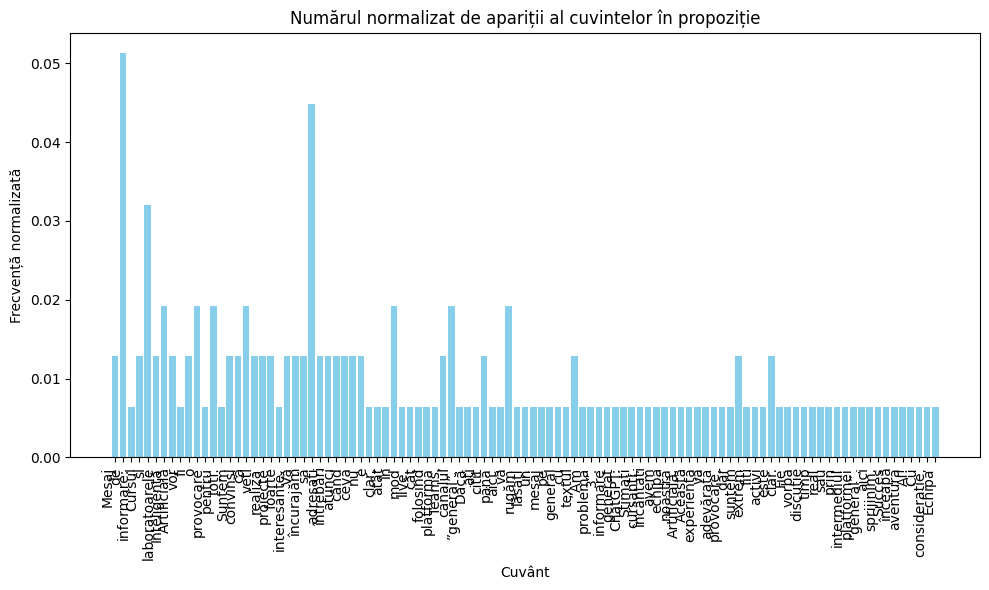

In [44]:
import matplotlib.pyplot as plt

def plot_word_counts(normalized_counts):
    # Extrage cuvintele și frecvențele normalizate
    words = list(normalized_counts.keys())
    frequencies = list(normalized_counts.values())

    # Creează diagrama de bare
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color='skyblue')
    plt.xlabel('Cuvânt')
    plt.ylabel('Frecvență normalizată')
    plt.title('Numărul normalizat de apariții al cuvintelor în propoziție')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

# Exemplu de utilizare cu propoziția normalizată de la pasul anterior
plot_word_counts(normalized_counts)